# Plot Cosmosis Chains

In [1]:
pwd

'/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins'

In [2]:
import pandas as pd

def read_cosmosis_chain(filename):
    header = []
    # Read only the header line
    with open(filename, 'r') as f:
        for line in f:
            if not line.startswith('#'):
                break
            else:
                header.append(line)
    raw_names = header[0].strip('#').strip().split('\t')
    clean_names = [name.split('--')[-1] for name in raw_names]

    # Load the actual data
    df = pd.read_csv(filename, comment='#', delim_whitespace=True, header=None)
    df.columns = clean_names
    return df

# Usage
#chain_file = '/global/u2/a/arwa_mq/DESy3/Boost_Factor/outputs/test_per_bin.txt'

chain_file00 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l0_z0.txt'
chain_file10 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l1_z0.txt' 
chain_file20 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l2_z0.txt' 
chain_file30 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l3_z0.txt' 

chain_file01 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l0_z1.txt'
chain_file11 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l1_z1.txt' 
chain_file21 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l2_z1.txt' 
chain_file31 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l3_z1.txt' 

chain_file02 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l0_z2.txt'
chain_file12 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l1_z2.txt' 
chain_file22 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l2_z2.txt' 
chain_file32 = '/Users/aa3044/Documents/GitHub/Boost_factor_cosmosis/pipeline_all_bins/outputs_all_bins/run1/output_l3_z2.txt' 
 
#test_per_bin00for_plot.txt'
df00 = read_cosmosis_chain(chain_file00)
df10 = read_cosmosis_chain(chain_file10)
df20 = read_cosmosis_chain(chain_file20)
df30 = read_cosmosis_chain(chain_file30)

df01 = read_cosmosis_chain(chain_file01)
df11 = read_cosmosis_chain(chain_file11)
df21 = read_cosmosis_chain(chain_file21)
df31 = read_cosmosis_chain(chain_file31)

df02 = read_cosmosis_chain(chain_file02)
df12 = read_cosmosis_chain(chain_file12)
df22 = read_cosmosis_chain(chain_file22)
df32 = read_cosmosis_chain(chain_file32)


/var/folders/6j/1zd9ncd53d768vh6bskpy7tc0000gp/T/ipykernel_65901/2820176053.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, comment='#', delim_whitespace=True, header=None)
/var/folders/6j/1zd9ncd53d768vh6bskpy7tc0000gp/T/ipykernel_65901/2820176053.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, comment='#', delim_whitespace=True, header=None)
/var/folders/6j/1zd9ncd53d768vh6bskpy7tc0000gp/T/ipykernel_65901/2820176053.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, comment='#', delim_whitespace=True, header=None)
/var/folders/6j/1zd9ncd53d768vh6bskpy7tc0000gp/T/ipykernel_65901/2820176053.py:16: FutureWa

In [ ]:
from getdist import plots, MCSamples
import matplotlib.pyplot as plt
import numpy as np

def plot_corner_getdist(df, param_labels=None, name_tag='chain', sigma_clip=3, external_means=None):
    """
    Generate a corner plot from a CosmoSIS DataFrame using GetDist.
    - Converts 'log' parameters to linear scale.
    - Clips each parameter to +/- N sigma.
    
    Parameters:
    - df: pandas DataFrame with samples, may contain a 'post' column.
    - param_labels: Optional list of LaTeX-style labels.
    - name_tag: Optional string to tag the chain.
    - sigma_clip: Number of standard deviations for clipping (default: 5σ).

    Returns:
    - fig: The matplotlib figure object.
    """
    # Drop 'prior' column if it exists
    df_params = df.drop(columns=['prior','post']) if 'prior' in df.columns else df.copy()

    # Drop rows with NaN or inf
    df_params = df_params.replace([np.inf, -np.inf], np.nan).dropna()

    # Convert log columns to linear and rename
    clean_names = []
    for col in df_params.columns:
        if col.startswith('log'):
            df_params[col] = 10**df_params[col]
            clean_names.append(col[3:])  # remove 'log'
        else:
            clean_names.append(col)
    df_params.columns = clean_names

    # 5-sigma clipping
    for col in df_params.columns:
        mu = df_params[col].mean()
        sigma = df_params[col].std()
        df_params = df_params[(df_params[col] > mu - sigma_clip * sigma) &
                              (df_params[col] < mu + sigma_clip * sigma)]

    # Parameter labels
    labels = param_labels if param_labels is not None else clean_names
    truths = [external_means.get(name, (None,))[0] for name in clean_names]
    print(truths)
    # GetDist MCSamples
    samples = MCSamples(samples=df_params.values,
                        names=clean_names,
                        labels=labels,
                        name_tag=name_tag)

    # Plot
    g = plots.getSubplotPlotter()
    g.triangle_plot([samples], filled=True, truths=truths, truth_color='r')
    # For each parameter, add a vertical reference line at the external mean
    for pname, (mean, sigma) in external_means.items():
        if mean is not None and pname in clean_names:
            # Get the axis for the 1D marginal of this parameter
            ax = g.subplots[clean_names.index(pname), clean_names.index(pname)]
            ax.axvline(mean, color='k', linestyle='--', linewidth=1.5)
            # Optional: add ±1σ shading
            ax.axvspan(mean - sigma, mean + sigma, color='gray', alpha=0.2)
    return g.fig


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_trace(df, burnin=0.0, external_means=None):
    """
    Plot trace plots with:
    - Horizontal lines at sample mean (red dashed)
    - Optional reference values from other work (black dashed)

    Parameters:
    - df: pandas DataFrame with samples, may include 'post'.
    - burnin: fraction of samples to discard.
    - external_means: dict of {param_name: (mean, sigma)} in linear scale.

    Returns:
    - fig: matplotlib figure.
    """
    # Drop 'post' column and clean
    df_params = df.drop(columns='prior') if 'prior' in df.columns else df.copy()
    df_params = df_params.replace([np.inf, -np.inf], np.nan).dropna()

    # Convert log columns to linear
    trace_df = df_params.copy()
    new_names = []
    for col in trace_df.columns:
        if col.startswith("log"):
            trace_df[col] = 10**trace_df[col]
            new_names.append(col[3:])
        else:
            new_names.append(col)
    trace_df.columns = new_names

    # Apply burn-in
    if burnin > 0.0:
        n = int(len(trace_df) * burnin)
        trace_df = trace_df.iloc[n:]

    # Plot setup
    n_params = len(trace_df.columns)
    fig, axes = plt.subplots(n_params, 1, figsize=(10, 2.5 * n_params), sharex=True)
    if n_params == 1:
        axes = [axes]

    for i, col in enumerate(trace_df.columns):
        data = trace_df[col].values
        sample_mean = data.mean()

        axes[i].plot(data, lw=0.7, alpha=0.8)
        axes[i].axhline(sample_mean, color='r', linestyle='--', label=f'sample mean = {sample_mean:.3g}')

        if external_means and col in external_means:
            ref_mean, ref_sigma = external_means[col]
            axes[i].axhline(ref_mean, color='k', linestyle='--', label=f'ref = {ref_mean:.2f}')
            axes[i].fill_between(
                np.arange(len(data)),
                ref_mean - ref_sigma,
                ref_mean + ref_sigma,
                color='gray',
                alpha=0.2,
                label='±1σ ref'
            )

        axes[i].set_ylabel(col)
        axes[i].legend()
        axes[i].grid(True)

    axes[-1].set_xlabel("Sample index")
    fig.suptitle("Trace Plots with Sample Mean and External Reference", fontsize=15)
    fig.tight_layout(rect=[0, 0, 1, 0.96])

    return fig


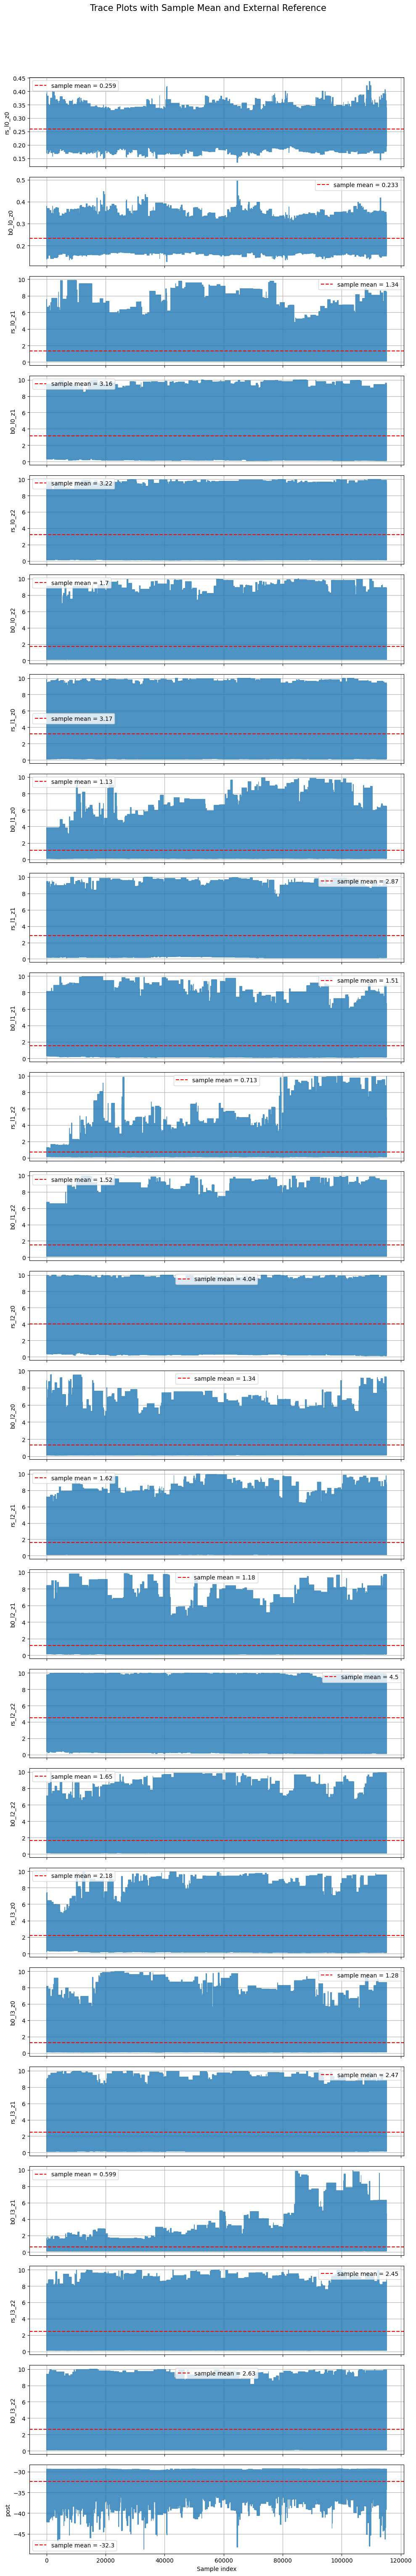

In [13]:
external_means = {
    'b0_00': (0.34, 0.05),
    'rs_00': (0.44, 0.06)
}

fig = plot_trace(df00, burnin=0.1, external_means=external_means)
plt.show()

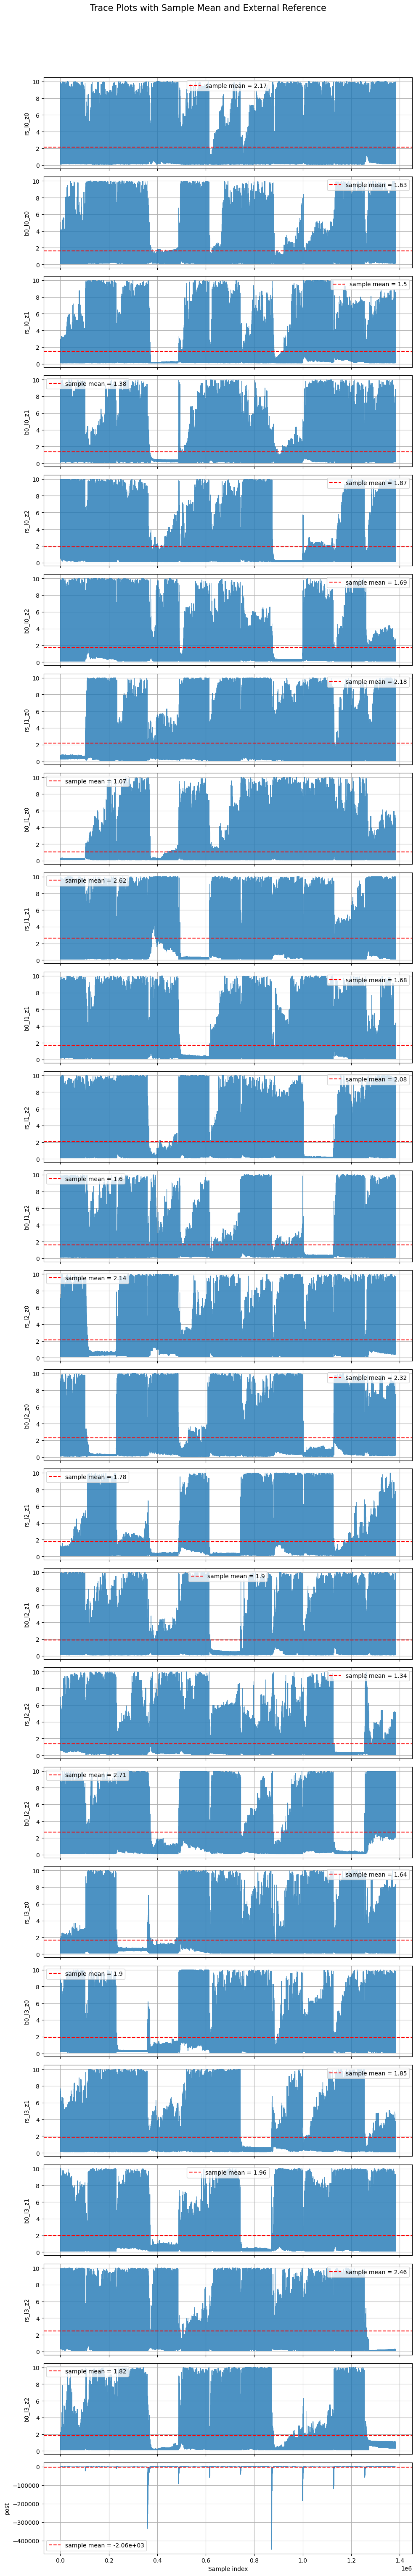

In [14]:
import pandas as pd

all_df = pd.concat([df00, df10, df20, df30, df01, df11, df21, df31, df02, df12, df22, df32], ignore_index=True)

external_means = {
    'b0_00': (0.34, 0.05),
    'rs_00': (0.44, 0.06)
}

fig = plot_trace(all_df, burnin=0.1, external_means=external_means)
plt.show()


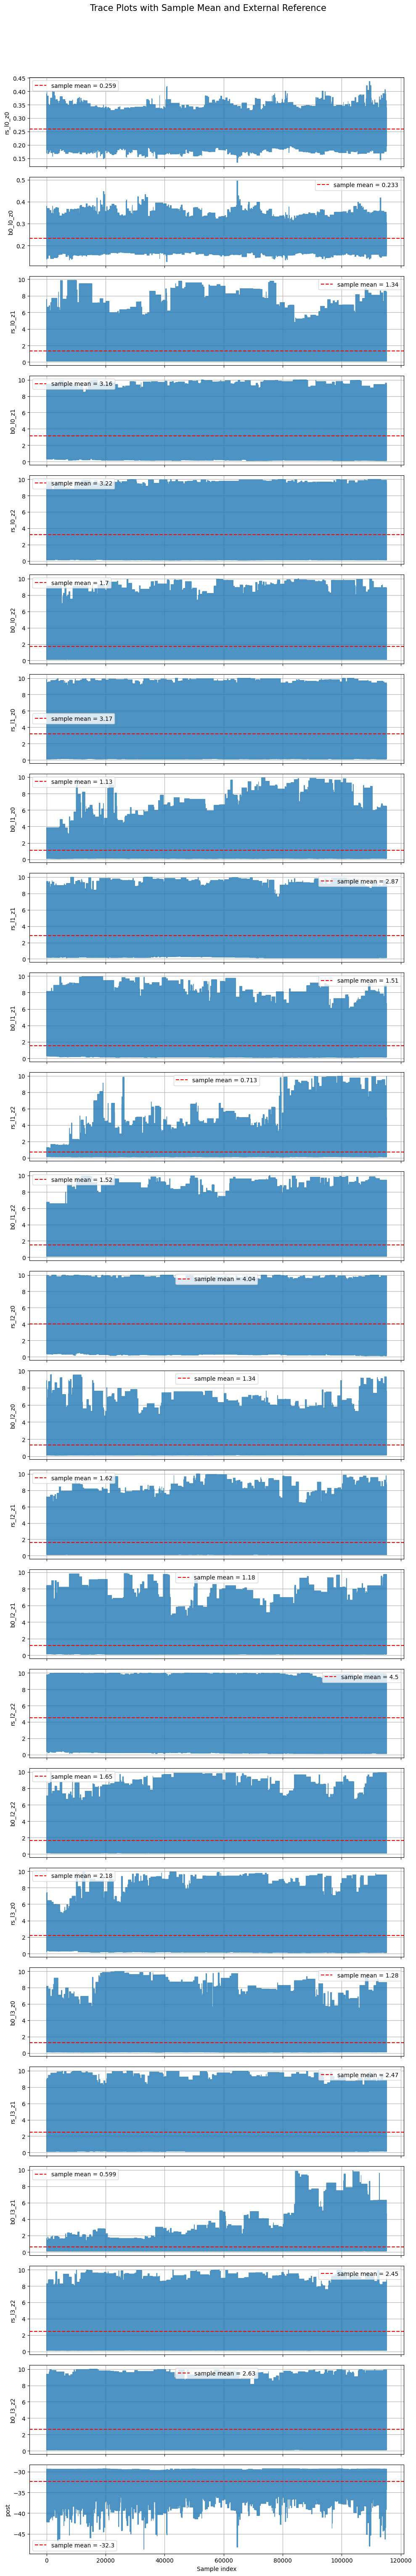

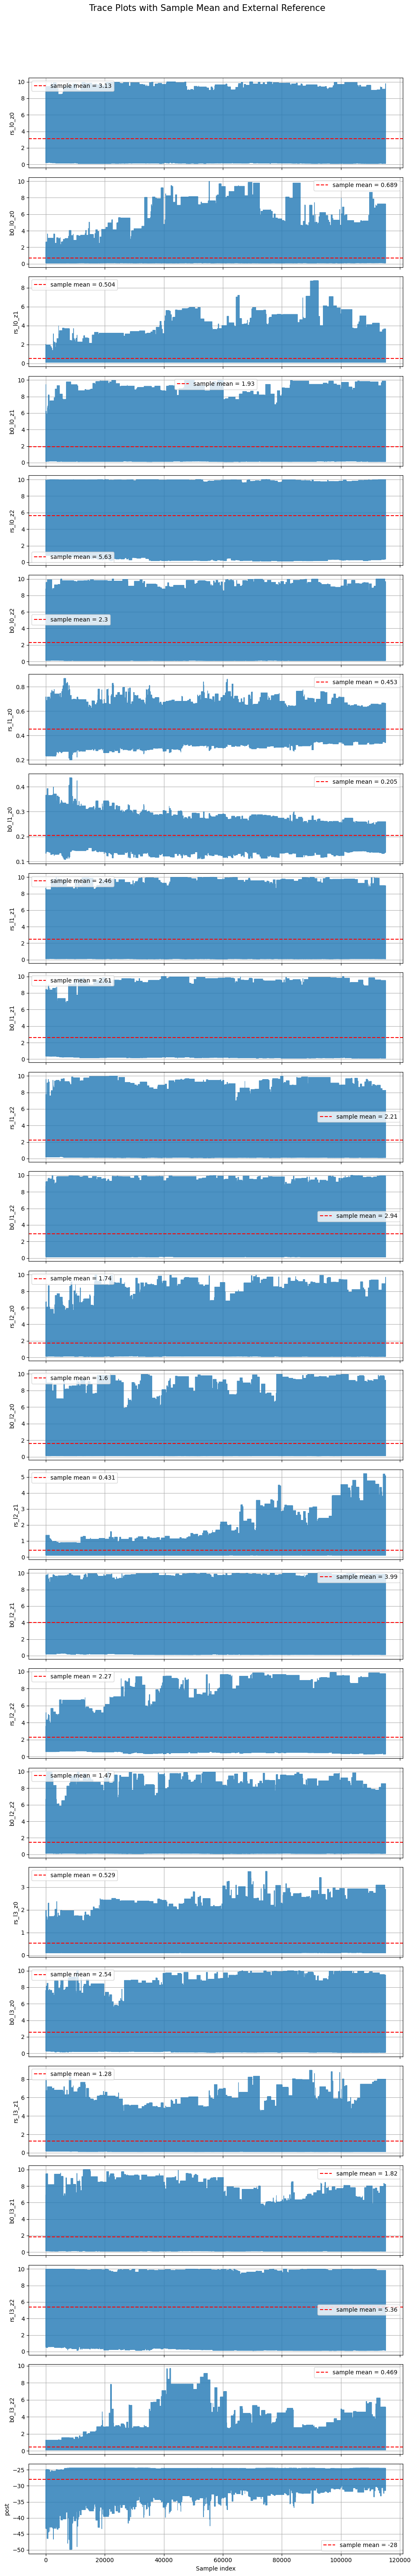

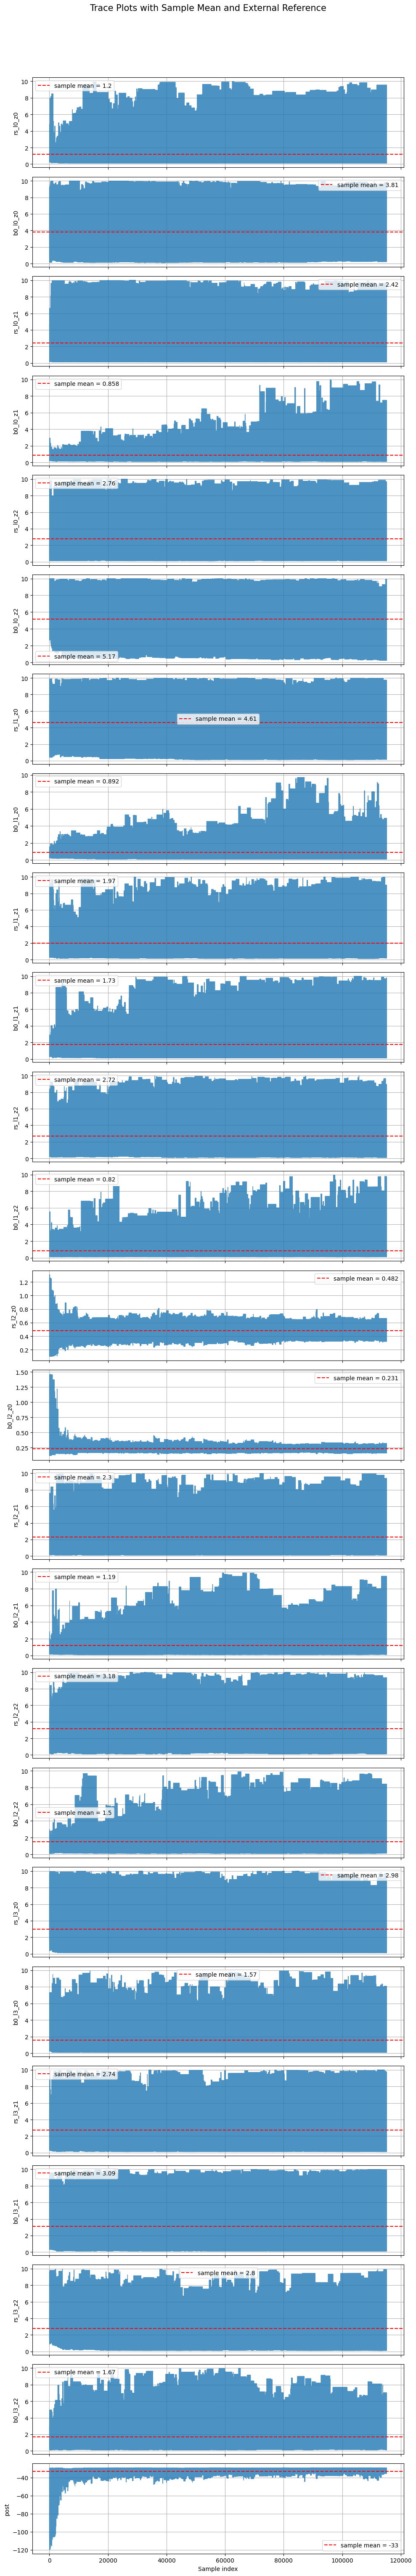

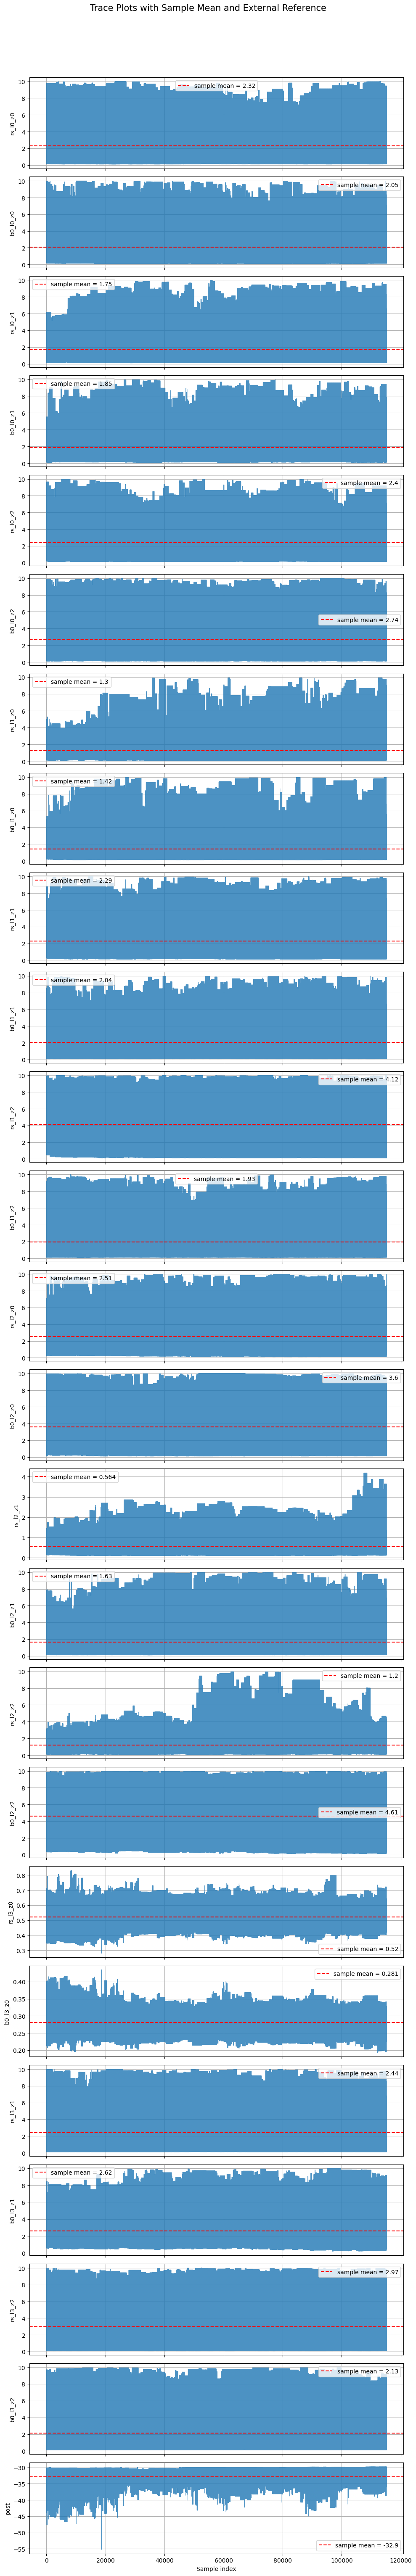

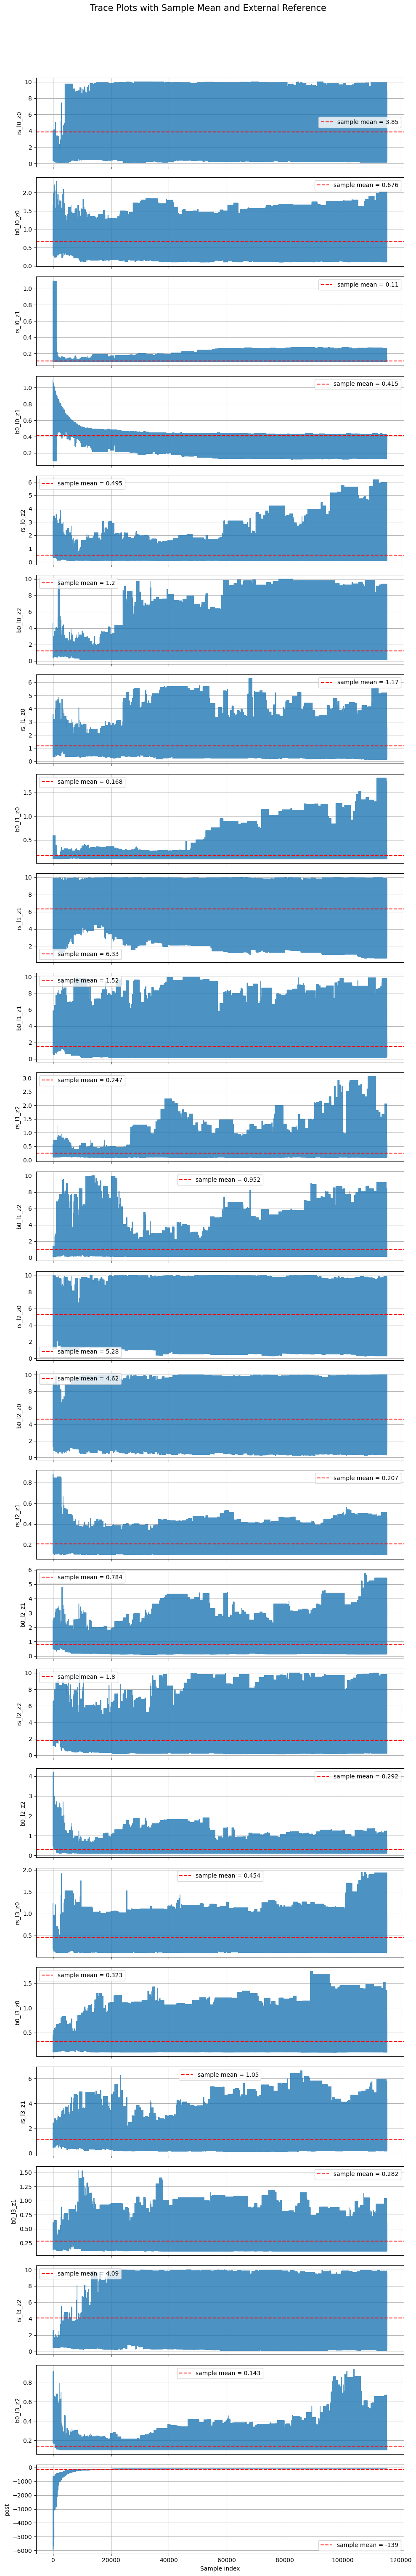

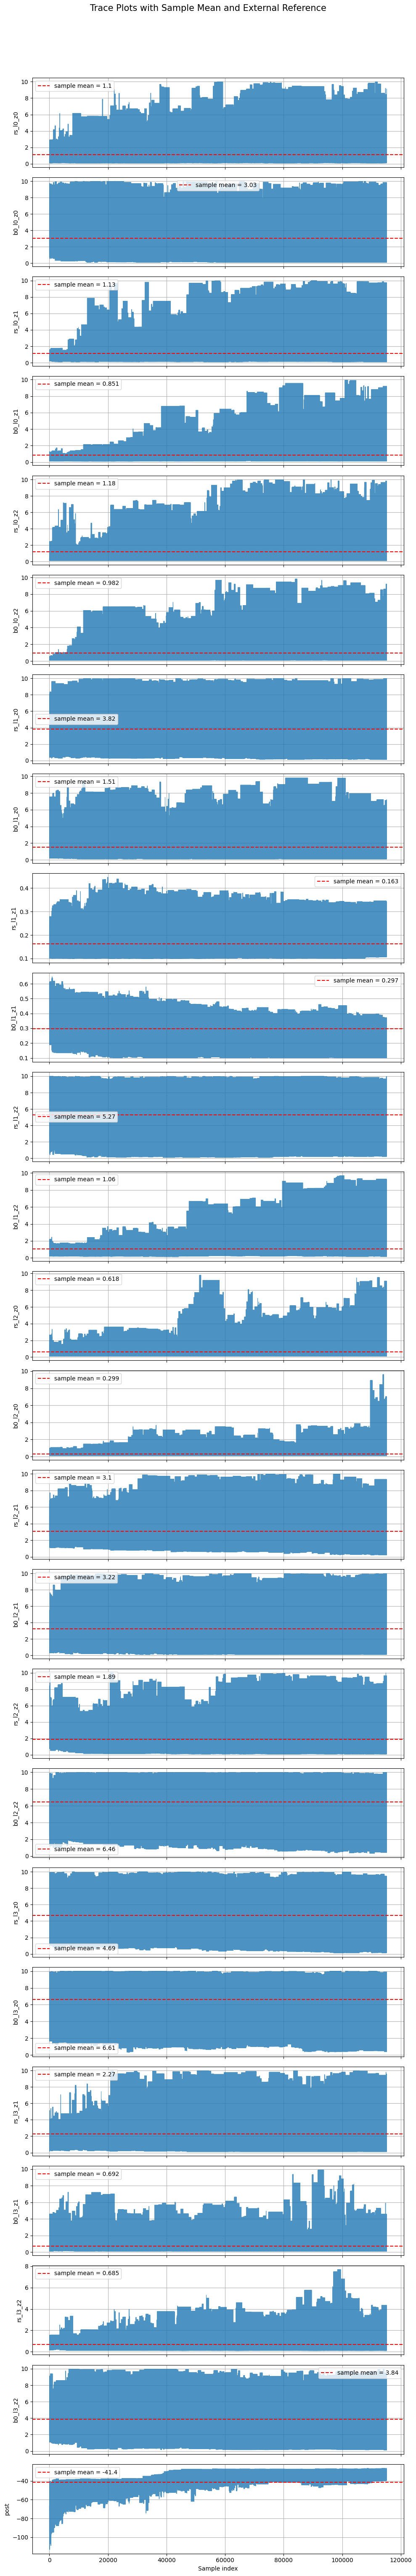

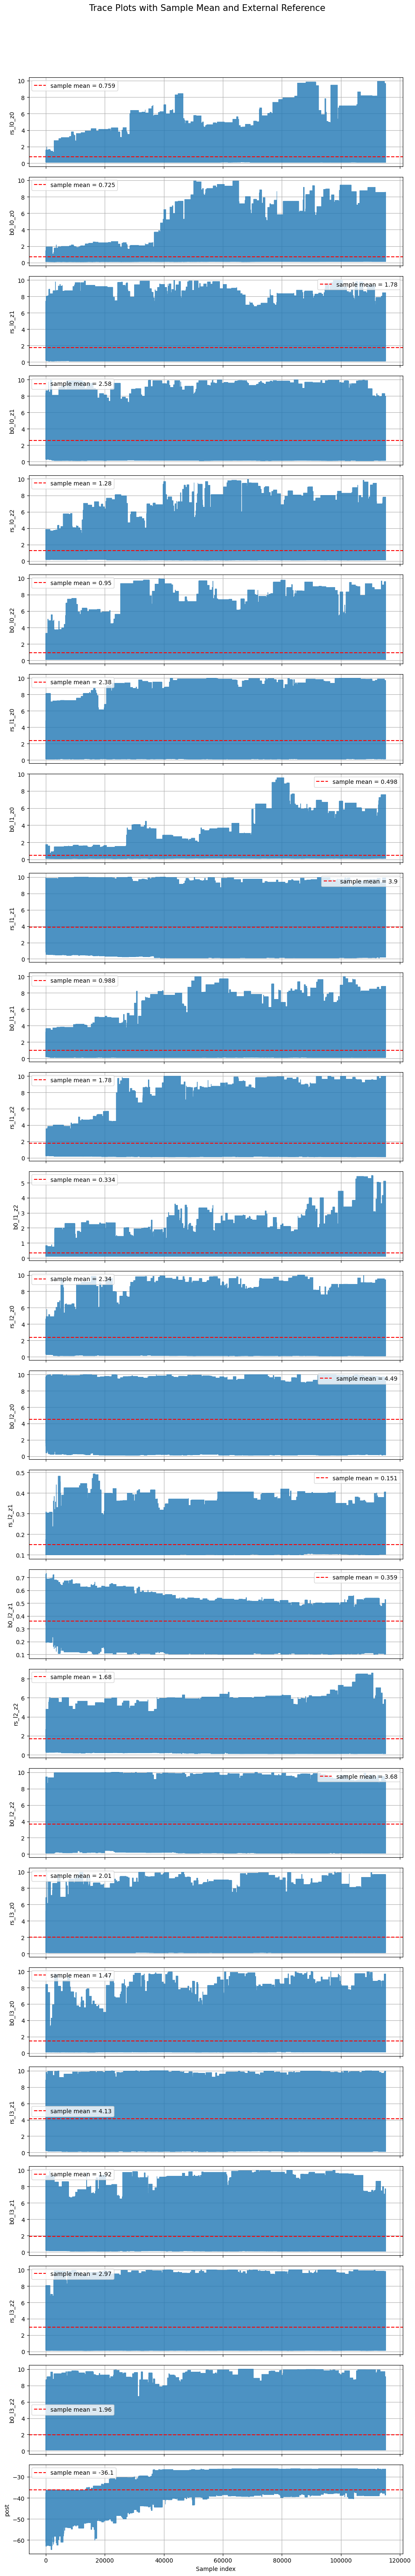

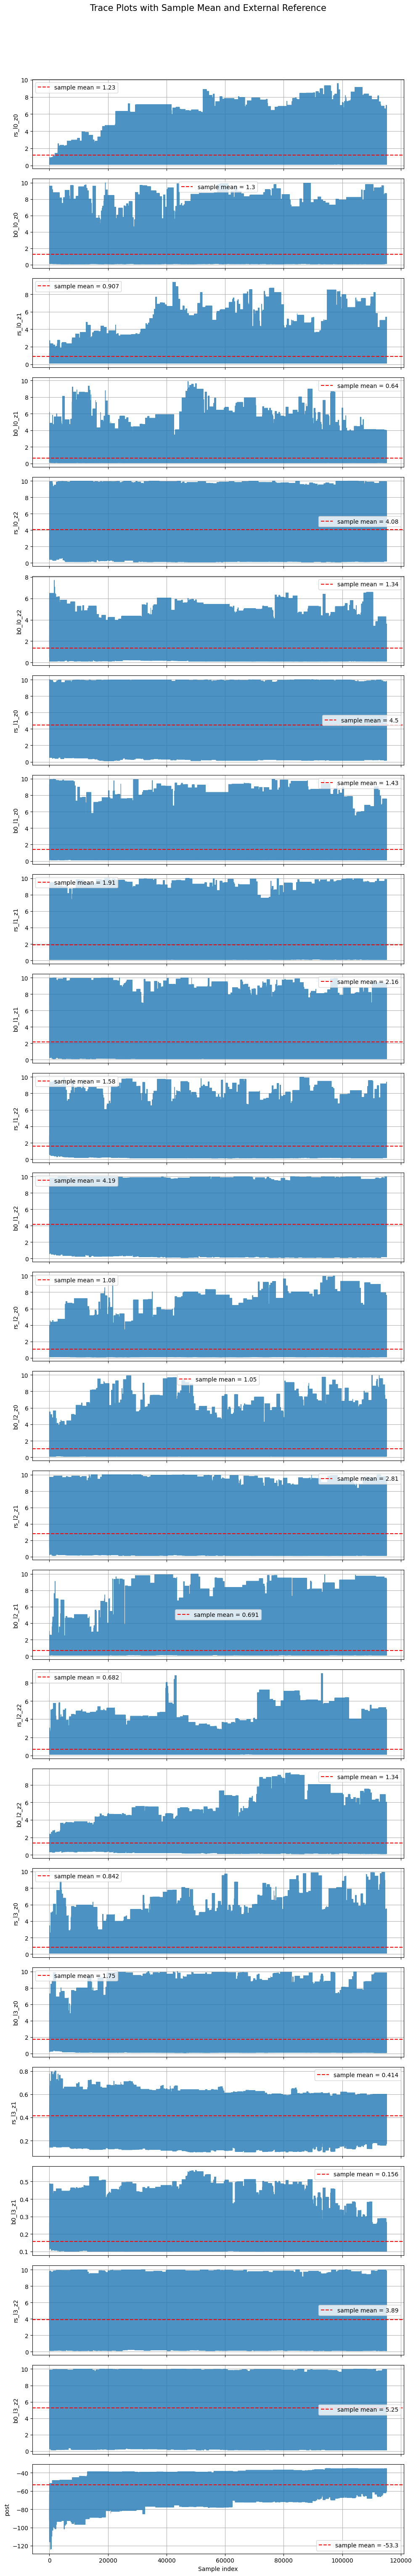

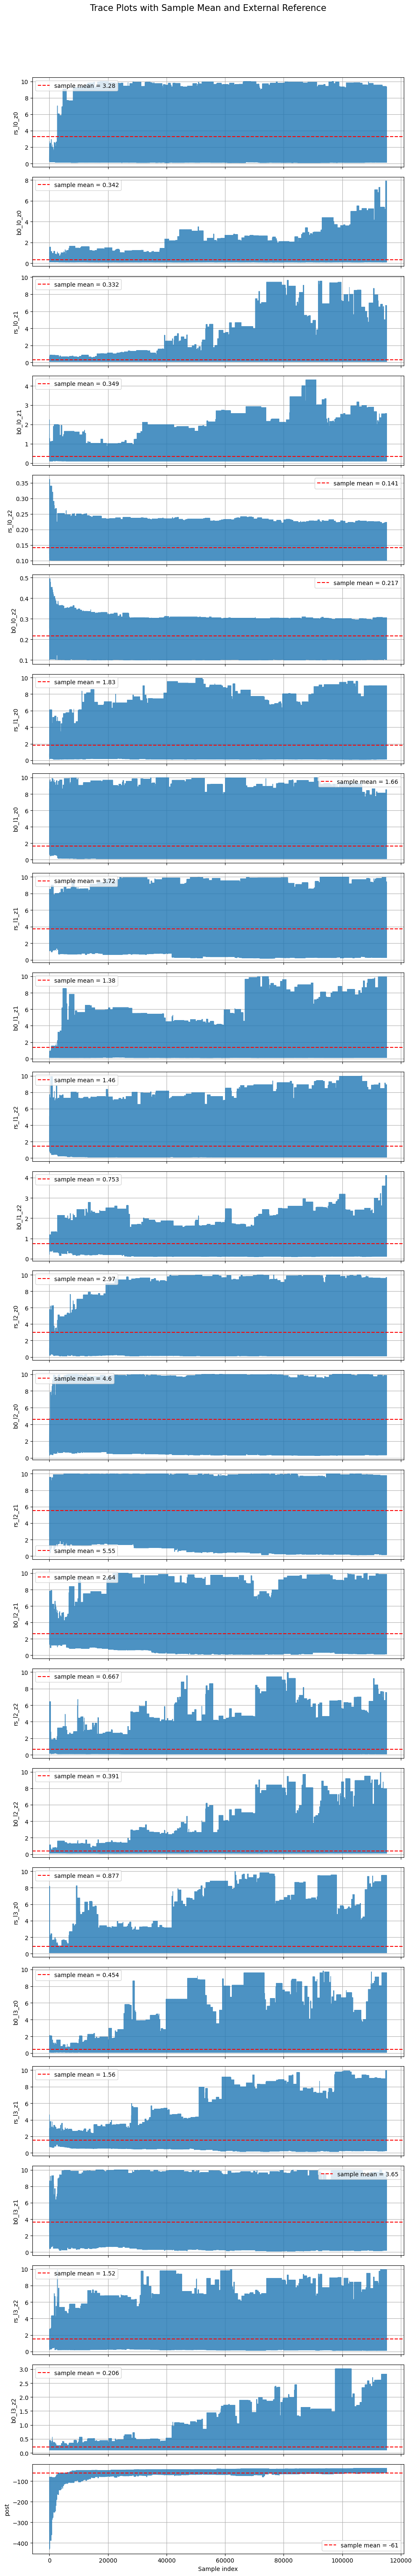

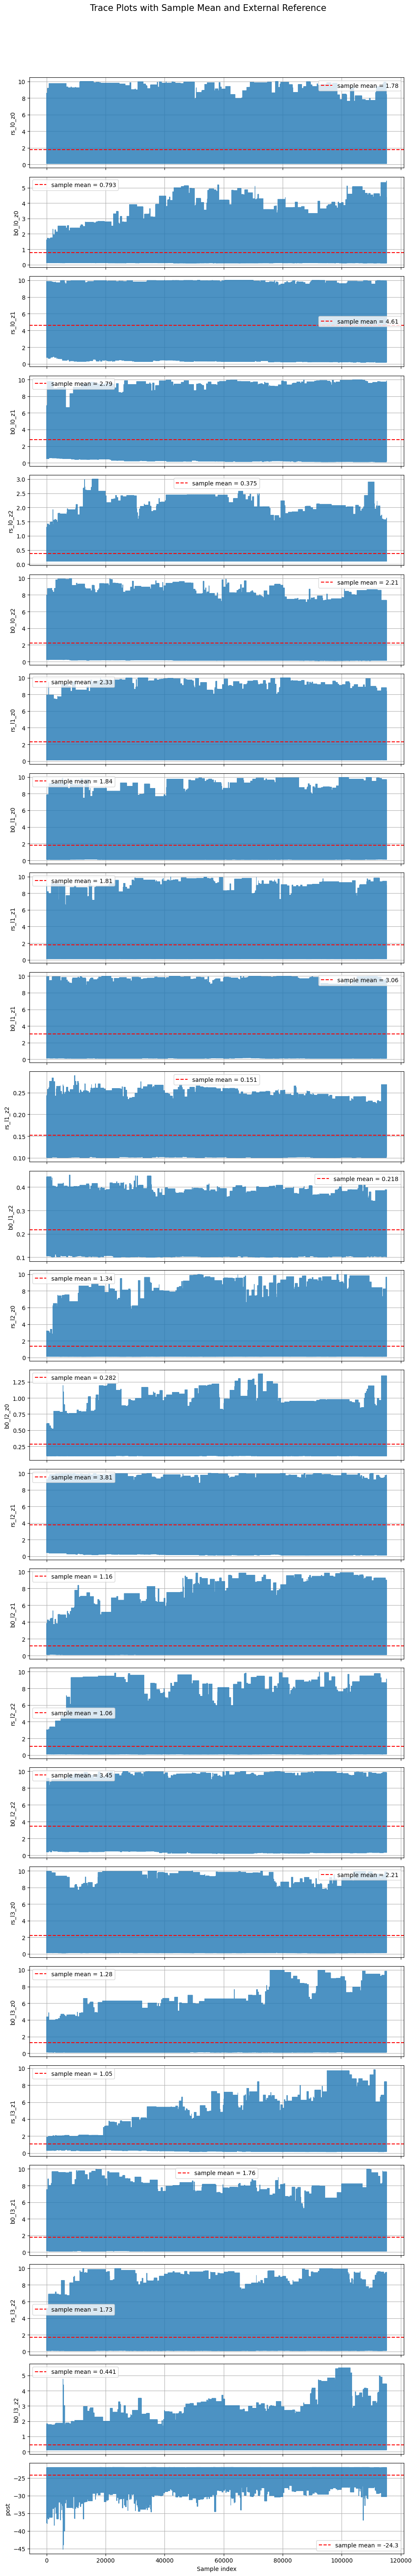

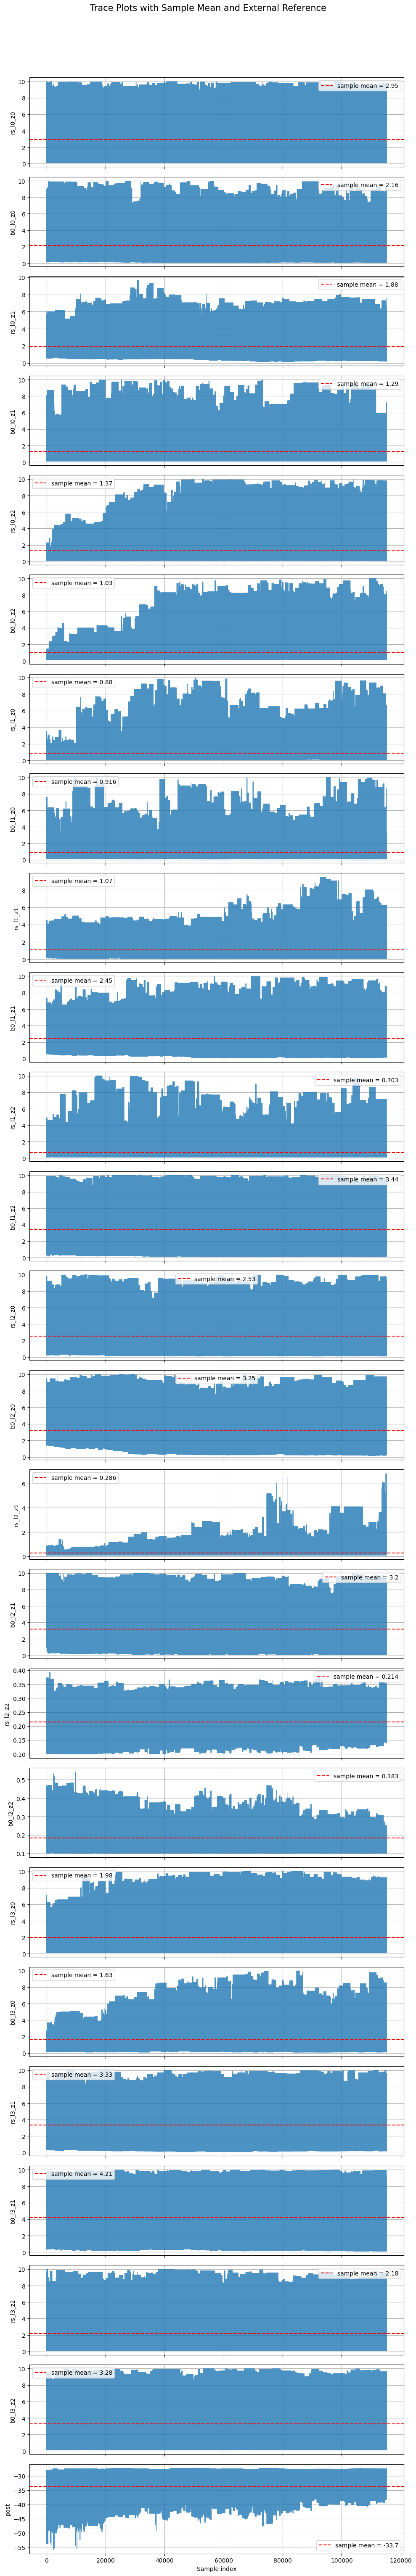

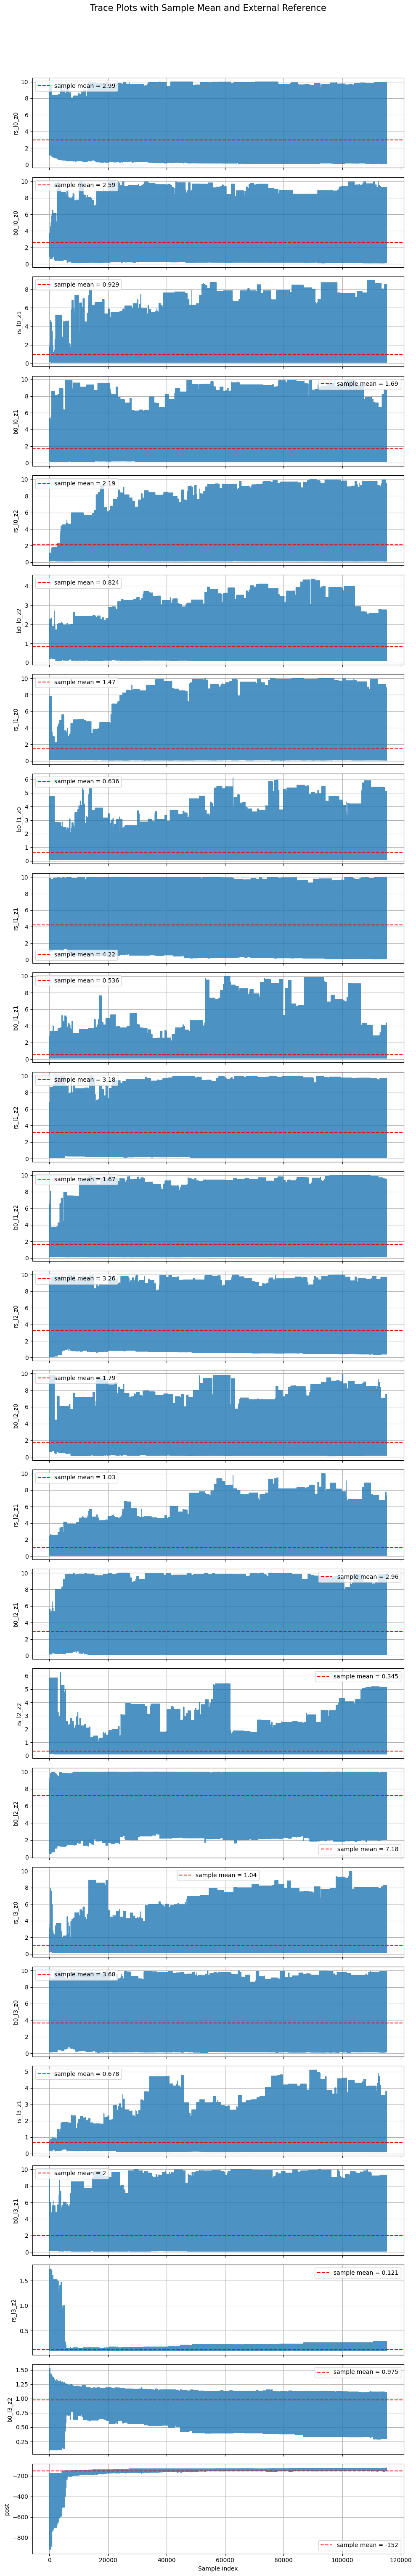

In [12]:
dfs = [df00, df10, df20, df30, df01, df11, df21, df31, df02, df12, df22, df32]

external_means = {
    'b0_00': (0.34, 0.05),
    'rs_00': (0.44, 0.06)
}

for i, df in enumerate(dfs):
    fig = plot_trace(df, burnin=0.1, external_means=external_means)
    plt.show()
